## Introducción a Pandas (4)

Durante el curso vamos a estar desarrollando los aspectos prácticos utilizando Python. Para aquellos que no estén muy familiarizados con el lenguaje, acá tenemos una introducción a las bibliotecas que más vamos a manejar.

Si necesitan más material, algunos libros para consultar (si los quieren, los podemos compartir):
* Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython
* Pandas for Everyone: Python Data Analysis

Cuentan con una serie de notebooks introductorias:
* Creación, lectura y escritura.
* Indexando, seleccionando y asignando.
* Tipos de datos, valores faltantes, funciones de resumen.
* **Agrupamientos y orden.**
* Renombrado y combinación.

En cada notebook van a encontrar algunos ejericios (opcionales).

Las notebooks se encuentran basadas en diversos tutoriales de Kaggle y cursos de la Unversidad de Berkeley.

Vamos a trabajar con el ``DataFrame`` de tweets que teníamos en la notebook anterior.

In [ ]:
import pandas as pd

In [ ]:
df_tweets = pd.read_csv('tweets.csv',index_col = 0)
df_tweets

### Agrupamiento

Además de operar con los registros de forma individual, también es posible que necesitemos agruparlos y luego aplicarles alguna transformación a los registros de cada grupo. Para agrupar podemos utilizar la función ``groupby``. Cada grupo puede ser visto como un slice del ``DataFrame`` conteniendo los registros cuyos valores matchean con el valor descriptor del grupo. 

Por ejemplo, podemos obtener para cada user el primer tweet que aparece en ``DataFrame``.

In [ ]:
df_tweets.groupby('user_id').apply(lambda df: df.index[0])

Para tener un mayor control, se puede agrupar por más de una columna.

Por ejemplo, vamos a transformar las fechas dejándolas en el formato ``año-mes-día``.

In [ ]:
df_tweets['created_at_day'] = pd.to_datetime(df_tweets['created_at']).apply(lambda x : str(x.date()))
df_tweets['created_at_day']

 Ahora vamos a agrupar por usuario y por día y vamos a obtener la máxima cantidad de retweets.

In [ ]:
df_tweets.groupby(['user_id','created_at_day']).apply(lambda df: df[df.retweets == df.retweets.max()])

Como pueden observar, este agrupamiento múltiple dio lugar a "multi indexes", es decir, a índices de múltiples niveles.

In [ ]:
df_tweets.groupby(['user_id','created_at_day']).apply(lambda df: df[df.retweets == df.retweets.max()]).index.names

También podemos utilizar cualquiera de las funciones de agregación que vimos antes.

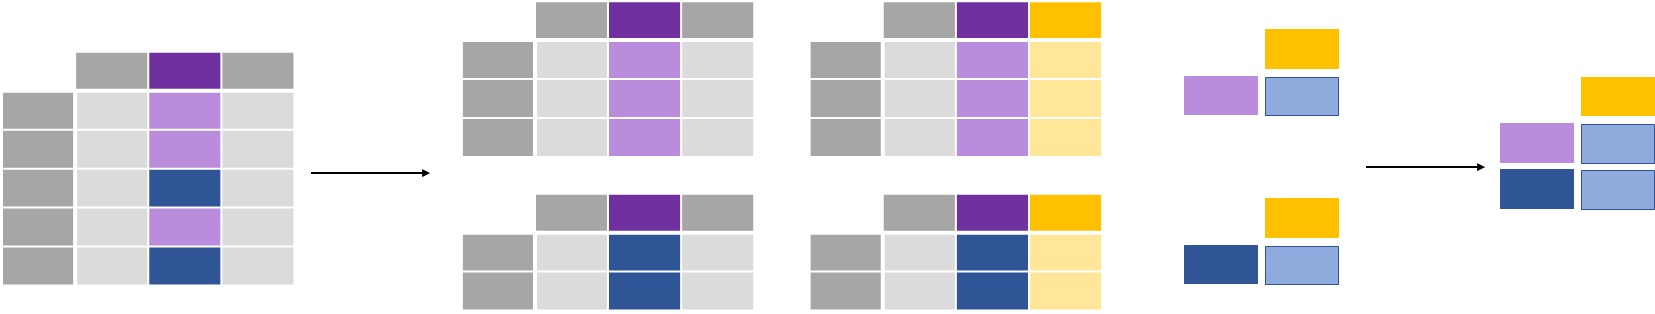

Por ejemplo, para cada usuario obtener el promedio de los favoritos.

In [ ]:
df_tweets.groupby('user_id')['favourites'].mean()

### Ordenamiento

Como pudimos observar, el agrupamiento retorna los datos de acuerdo al orden del índice y no del valor, es decir conservan el orden relativo de los elementos en el ``DataFrame`` original. Si los queremos ordenar, podemos utilizar el ``sort_values``.

Vamos a ordenar por fecha de publicación de los tweets.

In [ ]:
df_tweets.sort_values(by='created_at')

Por defecto, ordena de forma ascendente, para que sea de forma descendente hay que utilizar el parámetro ``ascending=False``.

In [ ]:
df_tweets.sort_values(by='created_at',ascending=False)

También podemos ordenar por más de una columna a la vez. 

Por ejemplo, vamos a ordenar por ``user_id`` y luego por la fecha de creación.

In [ ]:
df_tweets.sort_values(by=['user_id','created_at'])

También podemos ordenar por índice.

(En este caso no va a diferir del ``DataFrame`` original)

In [ ]:
df_tweets.sort_index()

### Ejercicios

1. Contar la cantidad de retweets por usuario

In [ ]:
# TODO

2. Ordenar a los usuarios de acuerdo a su cantidad promedio de retweets.

In [ ]:
# TODO

3. Obtener la cantidad promedio de menciones realizadas por cada usuario discriminado en replies (tweets con replied_id > 1), retweets (retweeted_id > 1) y el resto.


In [ ]:
# TODO